# Least square problem for polynomial regression 

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data points
- $\{ (x_i, y_i) \}_{i=1}^n$

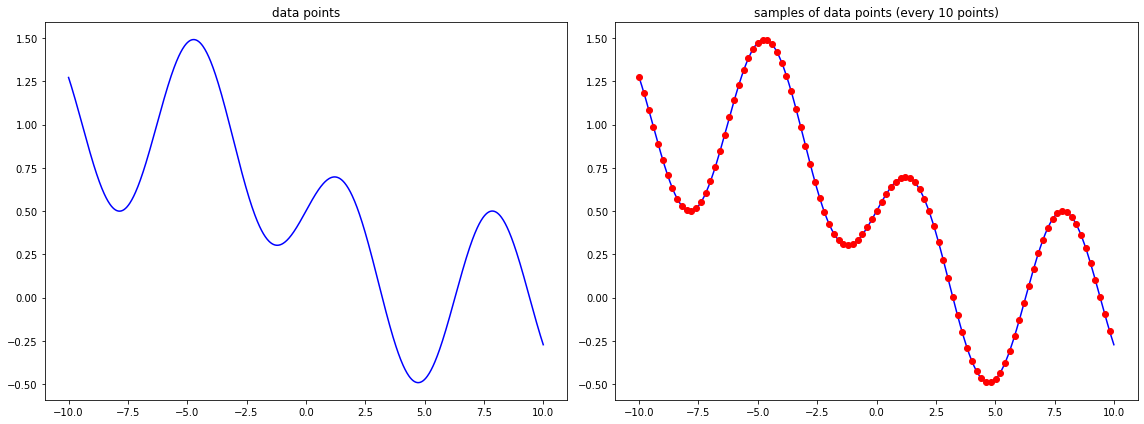

In [4]:
filename    = 'assignment_05_data.csv'
data        = np.loadtxt(filename, delimiter = ',')

x           = data[0, :]    # independent variable
y           = data[1, :]    # dependent variable

x_sample    = x[::10]       
y_sample    = y[::10]

plt.figure(figsize=(16,6))

plt.subplot(121)
plt.plot(x, y, '-', color = 'blue')
plt.title('data points')

plt.subplot(122)
plt.plot(x, y, '-', color = 'blue')
plt.plot(x_sample, y_sample, 'o', color = 'red')
plt.title('samples of data points (every 10 points)')

plt.tight_layout()
plt.show()

In [5]:
x[::50].shape # 비율을 말하는 것임.
print(x.shape)

(1000,)


In [6]:
y[::10].shape
print(y.shape)

(1000,)


## solve a linear system of equation $A z = b$
$$
A = 
\begin{bmatrix}
x_1^0 & x_1^1 & \cdots & x_1^{p-1}\\
x_2^0 & x_2^1 & \cdots & x_2^{p-1}\\
\vdots & \vdots & \vdots & \vdots\\
x_n^0 & x_n^1 & \cdots & x_n^{p-1}
\end{bmatrix},
\quad
z = 
\begin{bmatrix}
\theta_0\\
\theta_1\\
\vdots\\
\theta_{p-1}
\end{bmatrix},
\quad
b = 
\begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_n
\end{bmatrix}
$$

## construct matrix A for the polynomial regression with power $p-1$
- useful functions : `np.power`

In [90]:
print(x.dtype)
x1 = np.array([1.,2.,3.,4.,5.],dtype=np.float64)
A = np.zeros([5,3],dtype=np.float64)

A[:,0]=1
A[:,1]=x1
print(A)
for i in range(2,A.shape[1]):
    
    A[:,i] = np.power(A[:,i-1],i)
    
    
A

float64
[[1. 1. 0.]
 [1. 2. 0.]
 [1. 3. 0.]
 [1. 4. 0.]
 [1. 5. 0.]]


array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.]])

In [169]:
def construct_matrix_A(x, p):
    
    n = len(x)
    A = np.zeros([n, p],dtype=np.float64)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    x = np.array(x,dtype=np.float64)
    A[:,0]=np.ones((n,),dtype=np.float64)
    
    A[:,1]=x
    
    for i in range(2,p):
        
        A[:,i] = np.power(A[:,i-1],i)
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return A

In [170]:
res = construct_matrix_A(x1,5)

print(res)

[[1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00]
 [1.000000e+00 2.000000e+00 4.000000e+00 6.400000e+01 1.677722e+07]
 [1.000000e+00 3.000000e+00 9.000000e+00 7.290000e+02 2.824295e+11]
 [1.000000e+00 4.000000e+00 1.600000e+01 4.096000e+03 2.814750e+14]
 [1.000000e+00 5.000000e+00 2.500000e+01 1.562500e+04 5.960464e+16]]


## construct vector $b$

In [171]:
def construct_vector_b(y):

    n = len(y)
    b = np.zeros([n, 1])

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    b = y
    b = np.array(b,dtype = np.float64)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return b

In [172]:

A = construct_matrix_A(x,1000)
b = construct_vector_b(y)
At = np.transpose(A)

print(A)


[[  1.       -10.       100.       ...        inf        inf        inf]
 [  1.        -9.97998   99.600001 ...        inf        inf        inf]
 [  1.        -9.95996   99.200803 ...        inf        inf        inf]
 ...
 [  1.         9.95996   99.200803 ...        inf        inf        inf]
 [  1.         9.97998   99.600001 ...        inf        inf        inf]
 [  1.        10.       100.       ...        inf        inf        inf]]


C:\Users\key23\AppData\Local\Temp\ipykernel_12124\1731268773.py:17: RuntimeWarning: overflow encountered in power
  A[:,i] = np.power(A[:,i-1],i)


In [173]:
print(At)

[[  1.         1.         1.       ...   1.         1.         1.      ]
 [-10.        -9.97998   -9.95996  ...   9.95996    9.97998   10.      ]
 [100.        99.600001  99.200803 ...  99.200803  99.600001 100.      ]
 ...
 [       inf        inf        inf ...        inf        inf        inf]
 [       inf        inf        inf ...        inf        inf        inf]
 [       inf        inf        inf ...        inf        inf        inf]]


In [175]:
AtA = np.matmul(At,A)
AtA1 = np.linalg.inv(AtA)

C:\Users\key23\AppData\Local\Temp\ipykernel_12124\857113790.py:1: RuntimeWarning: overflow encountered in matmul
  AtA = np.matmul(At,A)
C:\Users\key23\AppData\Local\Temp\ipykernel_12124\857113790.py:1: RuntimeWarning: invalid value encountered in matmul
  AtA = np.matmul(At,A)


In [177]:
AtA1At = np.matmul(AtA1,At)
z = np.matmul(AtA1At,b)
z.shape

(1000,)

In [179]:
A.shape

Az = np.matmul(A,z)
Azb = Az - b 


(1000,)


## solve the linear system of equation $A z = b$
- without regularization : $\min \frac{1}{2 n}\| Az - b \|^2, \quad z = \left( A^T A \right)^{-1} A^T b$
- useful functions : `np.matmul, np.linalg.inv, np.sum`

In [216]:
def solve_regression(x, y, p):

    z       = np.zeros([p, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    A = construct_matrix_A(x,p)
    print('A shape :',A.shape)
    print('pA shape :',A.shape)
    b = construct_vector_b(y)
    print('b.shape :',b.shape)
    At = np.transpose(A)
    print('At.shape :',At.shape)
    AtA = np.matmul(At,A)
    print('AtA.shape : ',AtA.shape)
    AtAinv = np.linalg.inv(AtA)
    print('AtAinv shape :',AtAinv.shape)
    AtAinv_At = np.matmul(AtAinv,At)
    print('AtAinv_At.shape :',AtAinv_At.shape)
    z = np.matmul(AtAinv_At,b)

    Az = np.matmul(A,z)
    Azb = Az-b
    res = np.power(Azb,2)

    loss = res / 2*(A.shape[0])

    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return z, loss

- with regularization : $\min \frac{1}{2 n} \| A z - b \|^2 + \frac{\alpha}{2} \| z \|^2, \quad z = \left(A^{T} A + n \alpha I \right)^{-1} A^T b$ where $I$ denotes identity matrix
- useful functions : `np.matmul, np.linalg.inv, np.sum`

In [426]:
def solve_regression_with_regularization(x, y, p, alpha):

    z       = np.zeros([p, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    A = construct_matrix_A(x,p)
    print('<<<A shape :>>>',A.shape)
    b= construct_vector_b(y)
    print('<<< b shape :',b.shape)
    At = np.transpose(A)
    print('<<<At shape :',At.shape)
    AtA = np.matmul(At,A)
    print('AtA shape : ',AtA.shape)
    
    n = p
    na = n*alpha
    I = np.identity(AtA.shape[0])*na
    print('<<<<<naI.shape : ',I.shape)
    AtA_naI = AtA+I
    AtA_naI_inverse = np.linalg.inv(AtA_naI)

    AtA_naI_inverse_At = np.matmul(AtA_naI_inverse,At)
    z = np.matmul(AtA_naI_inverse_At,b)
    
    # +++++++++++++++++++++++++++++++++++++++++++++++++

    Az = np.matmul(A,z)
    Azb = Az-b
    res1 = np.power(Azb,2)
    res1 = res1 / 2 * p

    z_norm = np.power(z,2)
    res2 = z_norm * (alpha/2)
    
    res = res1+res2
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return z, loss

## approximate by polynomial regression
- $ \hat{y} = A z^* $
- useful functions : `np.matmul`

In [427]:
def approximate(x, y, p):

    n       = len(y)
    y_hat   = np.zeros([n, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    A = construct_matrix_A(x,p)
    z,loss = solve_regression(x,y,p)

    y_hat = np.matmul(A,z)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return y_hat, loss


In [428]:
def approximate_with_regularization(x, y, p, alpha):
    
    n       = len(y)
    y_hat   = np.zeros([n, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    A = construct_matrix_A(x,p)
    z,loss = solve_regression_with_regularization(x, y, p, alpha)
    
    y_hat = np.matmul(A,z)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return y_hat, loss

___

___

## functions for presenting the results

___

___

In [429]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.title('data points')
    plt.show()

In [430]:
def function_result_02():

    p           = 2
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [431]:
def function_result_03():

    p           = 4
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [432]:
def function_result_04():

    p           = 8
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [433]:
def function_result_05():

    p           = 16
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [434]:
def function_result_06():

    p           = 32 
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [435]:
def function_result_07():

    p           = 2 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [436]:
def function_result_08():

    p           = 4 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [437]:
def function_result_09():

    p           = 8 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [438]:
def function_result_10():

    p           = 16 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [439]:
def function_result_11():

    p           = 32 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [440]:
def function_result_12():

    p           = 4
    (_, loss)   = approximate(x, y, p)

    print('loss = ', loss)

In [441]:
def function_result_13():

    p           = 16
    (_, loss)   = approximate(x, y, p)

    print('loss = ', loss)

In [442]:
def function_result_14():

    p           = 4
    alpha       = 0.1
    (_, loss)   = approximate_with_regularization(x, y, p, alpha)

    print('loss = ', loss)

In [443]:
def function_result_15():

    p           = 16 
    alpha       = 0.1
    (_, loss)   = approximate_with_regularization(x, y, p, alpha)

    print('loss = ', loss)

___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


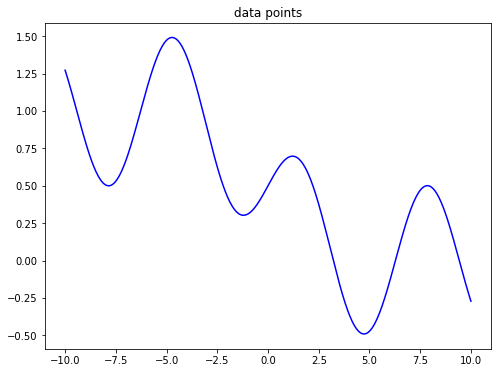

**************************************************
## [RESULT 02]
**************************************************
A shape : (1000, 2)
b.shape : (1000,)
At.shape : (2, 1000)
AtA.shape :  (2, 2)
AtAinv shape : (2, 2)
AtAinv_At.shape : (2, 1000)


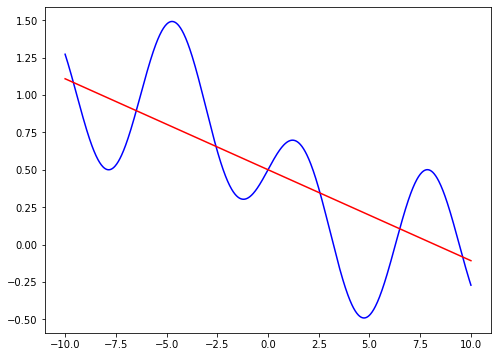

**************************************************
## [RESULT 03]
**************************************************
A shape : (1000, 4)
b.shape : (1000,)
At.shape : (4, 1000)
AtA.shape :  (4, 4)
AtAinv shape : (4, 4)
AtAinv_At.shape : (4, 1000)


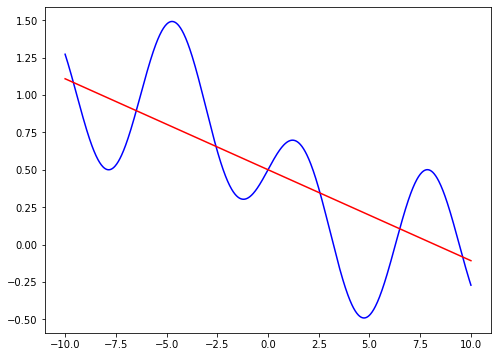

**************************************************
## [RESULT 04]
**************************************************
A shape : (1000, 8)
b.shape : (1000,)
At.shape : (8, 1000)
AtA.shape :  (8, 8)
AtAinv shape : (8, 8)
AtAinv_At.shape : (8, 1000)


C:\Users\key23\AppData\Local\Temp\ipykernel_12124\1731268773.py:17: RuntimeWarning: overflow encountered in power
  A[:,i] = np.power(A[:,i-1],i)
C:\Users\key23\AppData\Local\Temp\ipykernel_12124\2579782675.py:15: RuntimeWarning: overflow encountered in matmul
  AtA = np.matmul(At,A)
C:\Users\key23\AppData\Local\Temp\ipykernel_12124\2579782675.py:15: RuntimeWarning: invalid value encountered in matmul
  AtA = np.matmul(At,A)


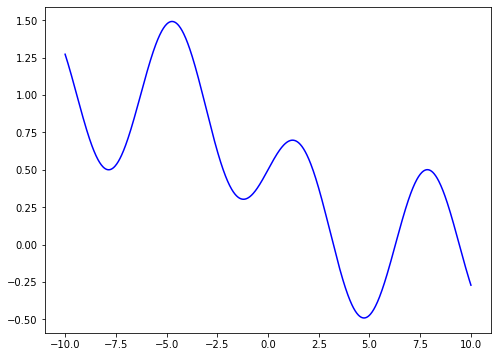

**************************************************
## [RESULT 05]
**************************************************
A shape : (1000, 16)
b.shape : (1000,)
At.shape : (16, 1000)
AtA.shape :  (16, 16)
AtAinv shape : (16, 16)
AtAinv_At.shape : (16, 1000)


C:\Users\key23\AppData\Local\Temp\ipykernel_12124\1731268773.py:17: RuntimeWarning: overflow encountered in power
  A[:,i] = np.power(A[:,i-1],i)
C:\Users\key23\AppData\Local\Temp\ipykernel_12124\2579782675.py:15: RuntimeWarning: overflow encountered in matmul
  AtA = np.matmul(At,A)
C:\Users\key23\AppData\Local\Temp\ipykernel_12124\2579782675.py:15: RuntimeWarning: invalid value encountered in matmul
  AtA = np.matmul(At,A)


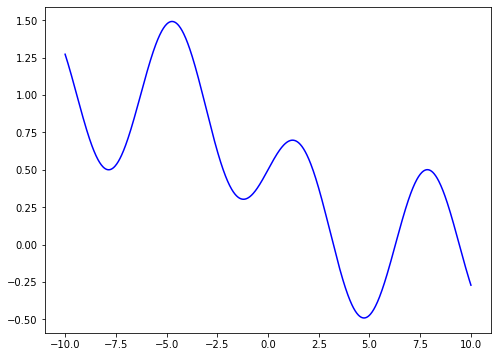

**************************************************
## [RESULT 06]
**************************************************
A shape : (1000, 32)
b.shape : (1000,)
At.shape : (32, 1000)
AtA.shape :  (32, 32)
AtAinv shape : (32, 32)
AtAinv_At.shape : (32, 1000)


C:\Users\key23\AppData\Local\Temp\ipykernel_12124\1731268773.py:17: RuntimeWarning: overflow encountered in power
  A[:,i] = np.power(A[:,i-1],i)
C:\Users\key23\AppData\Local\Temp\ipykernel_12124\2579782675.py:15: RuntimeWarning: overflow encountered in matmul
  AtA = np.matmul(At,A)
C:\Users\key23\AppData\Local\Temp\ipykernel_12124\2579782675.py:15: RuntimeWarning: invalid value encountered in matmul
  AtA = np.matmul(At,A)


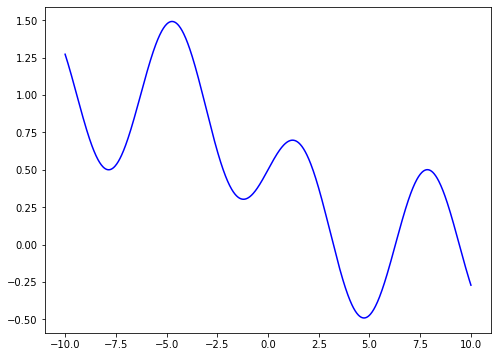

**************************************************
## [RESULT 07]
**************************************************
<<<A shape :>>> (1000, 2)
<<< b shape : (1000,)
<<<At shape : (2, 1000)
AtA shape :  (2, 2)
<<<<<naI.shape :  (2, 2)


ValueError: operands could not be broadcast together with shapes (1000,) (2,) 

In [444]:
number_result = 15

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)